# importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import streamlit as st

In [2]:
# Fetch Coca-Cola stock data
ticker = 'ko' # Coca-Cola stock ticker
data = yf.download(ticker, start='2015-01-01',end='2025-03-22')
# Reset index for easier handling
data.reset_index(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2570 non-null   datetime64[ns]
 1   (Close, KO)   2570 non-null   float64       
 2   (High, KO)    2570 non-null   float64       
 3   (Low, KO)     2570 non-null   float64       
 4   (Open, KO)    2570 non-null   float64       
 5   (Volume, KO)  2570 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 120.6 KB
None


In [4]:
print(data.head())

Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.437508  30.625306  30.191927  30.524182   9921100
1      2015-01-05  30.437508  31.037014  30.394172  30.834769  26292600
2      2015-01-06  30.668633  31.015334  30.509730  30.632518  16897500
3      2015-01-07  31.051464  31.138139  30.755323  30.914226  13412300
4      2015-01-08  31.427055  31.470394  31.130915  31.188699  21743600


In [5]:
print(data.tail())

Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
2565   2025-03-17  70.120003  70.169998  69.080002  69.239998  15634800
2566   2025-03-18  69.379997  70.190002  69.300003  70.110001  12657600
2567   2025-03-19  69.279999  69.379997  68.540001  68.550003  14780000
2568   2025-03-20  69.709999  69.809998  69.089996  69.309998  16295300
2569   2025-03-21  68.669998  69.970001  68.180000  69.709999  47479500


In [6]:
print(data.isnull().sum())

Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64


# visualization

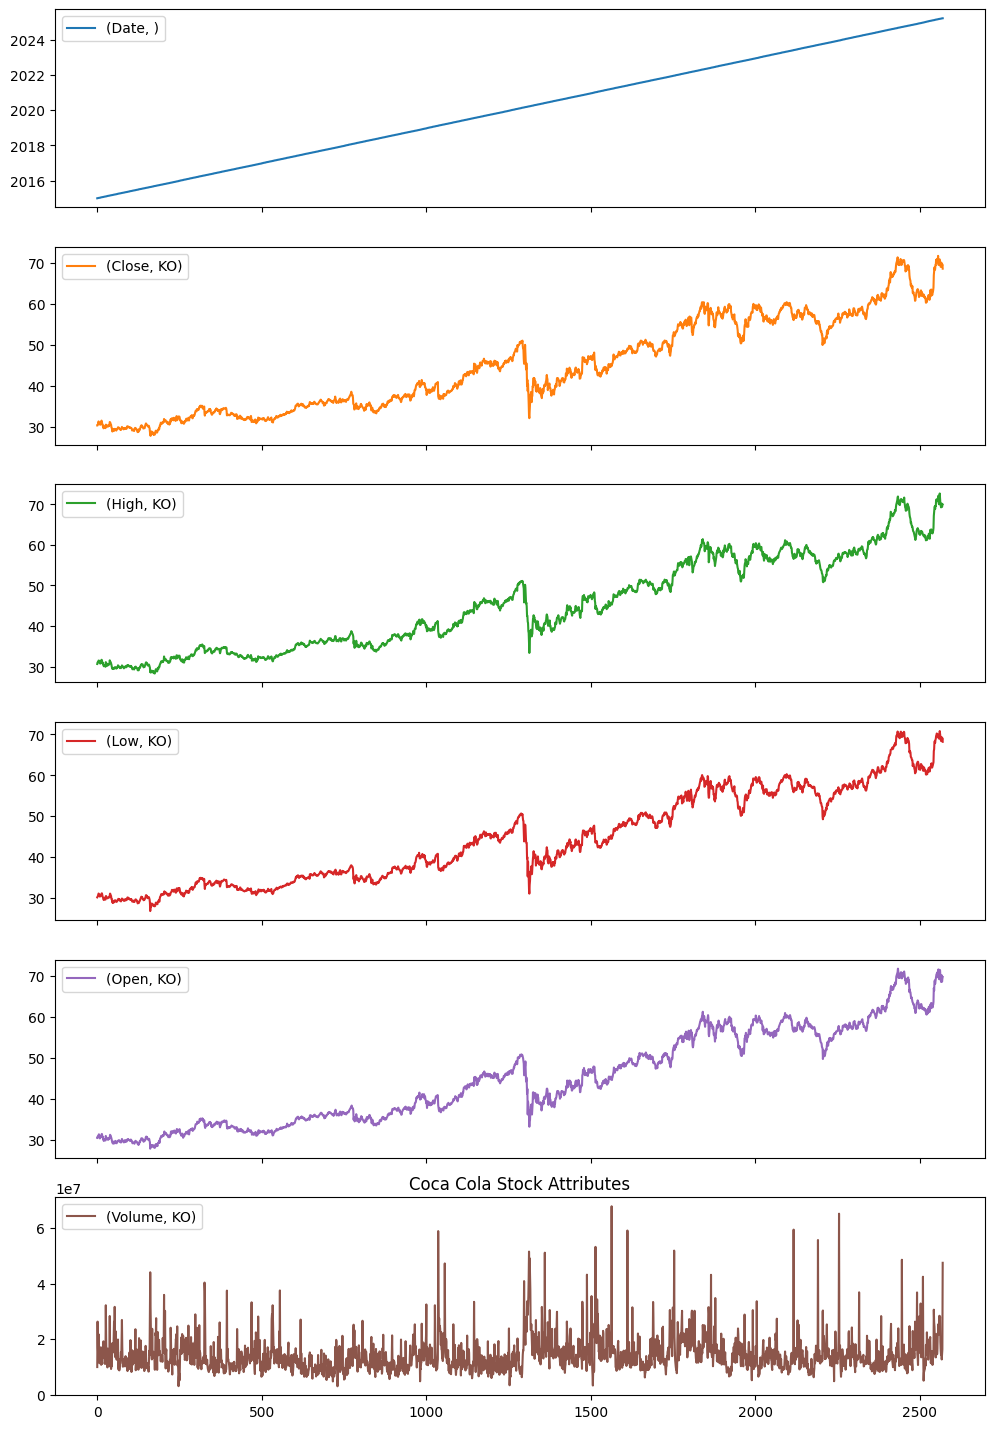

In [7]:
data.plot(subplots = True, figsize = (12,18))
plt.title('Coca Cola Stock Attributes')
plt.show()

# Moving Average

In [8]:
data['MA20']=data['Close'].rolling(window=20).mean()
data['MA50']=data['Close'].rolling(window=50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] =data['Daily_Return'].rolling(window=20).std()

In [9]:
print(data.isnull().sum())

Price         Ticker
Date                     0
Close         KO         0
High          KO         0
Low           KO         0
Open          KO         0
Volume        KO         0
MA20                    19
MA50                    49
Daily_Return             1
Volatility              20
dtype: int64


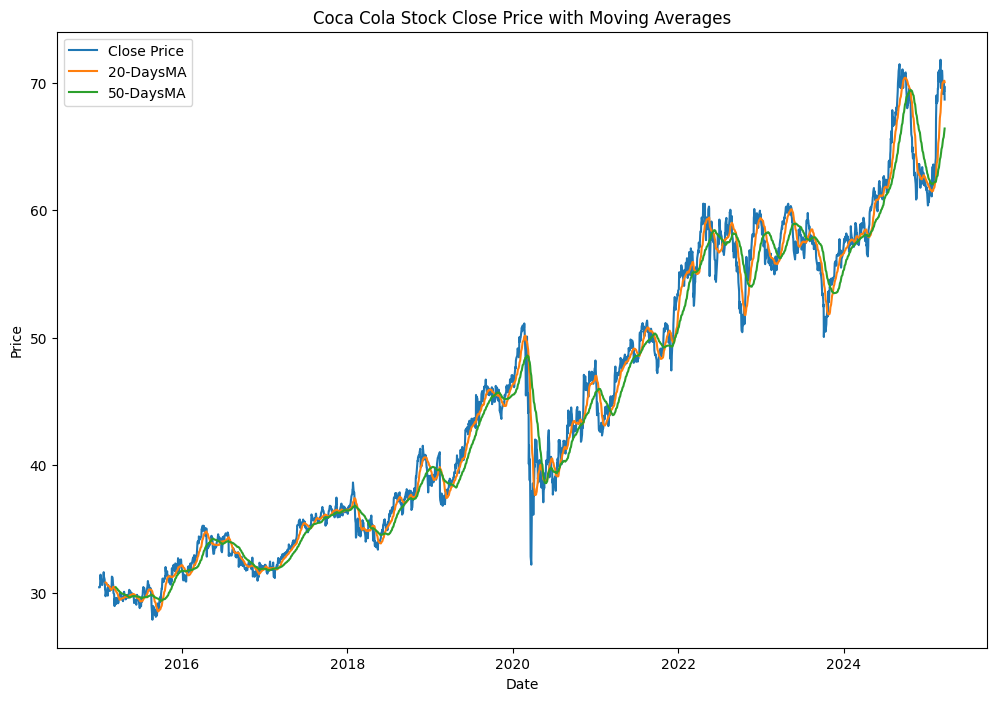

In [10]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Close'],label='Close Price')
plt.plot(data['Date'],data['MA20'],label='20-DaysMA')
plt.plot(data['Date'],data['MA50'],label='50-DaysMA')
plt.title('Coca Cola Stock Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Correaltion analysis

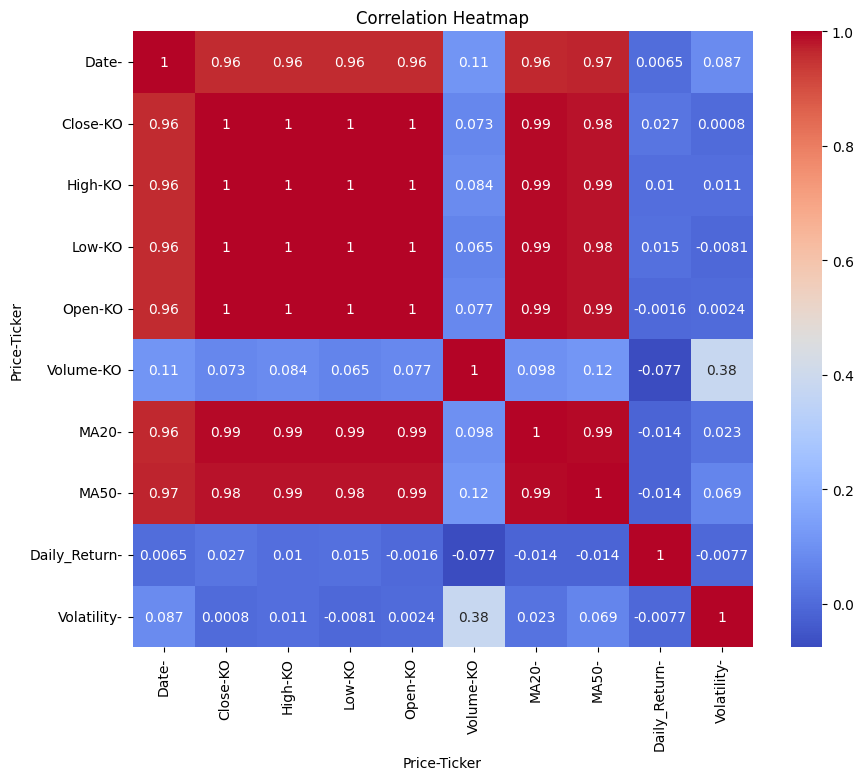

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Train and Test the split data 

In [12]:
x=data[['Open', 'High', 'Low', 'Volume','MA20','MA50','Daily_Return','Volatility']]
y=data[['Close']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [13]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

C:\Users\MUDIT JAIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.06233989641697914
Mean Absolute Error: 0.15758348539181716


In [14]:
 live_data = yf.download(ticker, period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [15]:
print(live_data.head())
live_data.shape


Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-05-02 13:30:00+00:00  71.470001  71.599998  71.379997  71.500000  424232
2025-05-02 13:31:00+00:00  71.629997  71.730003  71.449997  71.474998  103950
2025-05-02 13:32:00+00:00  71.582497  71.690002  71.550003  71.620003   49431
2025-05-02 13:33:00+00:00  71.660004  71.720001  71.559998  71.584999   54967
2025-05-02 13:34:00+00:00  71.559998  71.699997  71.529999  71.699997   52312


(390, 5)

In [16]:
print(live_data.tail())

Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-05-02 19:55:00+00:00  71.650002  71.690002  71.629997  71.690002   92897
2025-05-02 19:56:00+00:00  71.690002  71.699997  71.635002  71.654999  117737
2025-05-02 19:57:00+00:00  71.730003  71.739998  71.669998  71.690002  129317
2025-05-02 19:58:00+00:00  71.660103  71.745003  71.660004  71.735001  157806
2025-05-02 19:59:00+00:00  71.654999  71.730003  71.650002  71.660004  293028


In [17]:
print(live_data)

Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-05-02 13:30:00+00:00  71.470001  71.599998  71.379997  71.500000  424232
2025-05-02 13:31:00+00:00  71.629997  71.730003  71.449997  71.474998  103950
2025-05-02 13:32:00+00:00  71.582497  71.690002  71.550003  71.620003   49431
2025-05-02 13:33:00+00:00  71.660004  71.720001  71.559998  71.584999   54967
2025-05-02 13:34:00+00:00  71.559998  71.699997  71.529999  71.699997   52312
...                              ...        ...        ...        ...     ...
2025-05-02 19:55:00+00:00  71.650002  71.690002  71.629997  71.690002   92897
2025-05-02 19:56:00+00:00  71.690002  71.699997  71.635002  71.654999  117737
2025-05-02 19:57:00+00:00  71.730003  71.739998  71.669998  71.690002  129317
2025-05-02 19:58:00+00:00  71.660103  71.745003  71.660004  71.7

In [18]:
live_data['MA20']=live_data['Close'].rolling(window=20).mean()
live_data['MA50']=live_data['Close'].rolling(window=50).mean()
live_data['Daily_Return']=live_data['Close'].pct_change()
live_data['Volatility']=live_data['Daily_Return'].rolling(window=20).std()

In [19]:
print(live_data.isnull().sum())

Price         Ticker
Close         KO         0
High          KO         0
Low           KO         0
Open          KO         0
Volume        KO         0
MA20                    19
MA50                    49
Daily_Return             1
Volatility              20
dtype: int64


In [20]:
live_data.fillna(0,inplace=True)

In [21]:
print(live_data.isnull().sum())

Price         Ticker
Close         KO        0
High          KO        0
Low           KO        0
Open          KO        0
Volume        KO        0
MA20                    0
MA50                    0
Daily_Return            0
Volatility              0
dtype: int64


# Predicting live data

In [22]:
 features = ['Close', 'High', 'Low', 'Open','Volume','MA20','MA50','Daily_Return']
 latest_features = live_data[features].iloc[-1:].dropna()
 live_prediction = model.predict(latest_features)
 print(f"Predicted Closing Price: {live_prediction[0]}")

Predicted Closing Price: 70.80042434692383


In [23]:
st.title('Coca-Cola Stock Price Prediction')
 # Show prediction
st.write(f"Predicted Closing Price: {live_prediction[0]}")


2025-05-04 16:01:44.430 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 16:01:47.143 
  command:

    streamlit run C:\Users\MUDIT JAIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-04 16:01:47.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 16:01:47.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 16:01:47.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
